Bi-directional BFS Path: ['A', 'B', 'D', 'F', 'G']


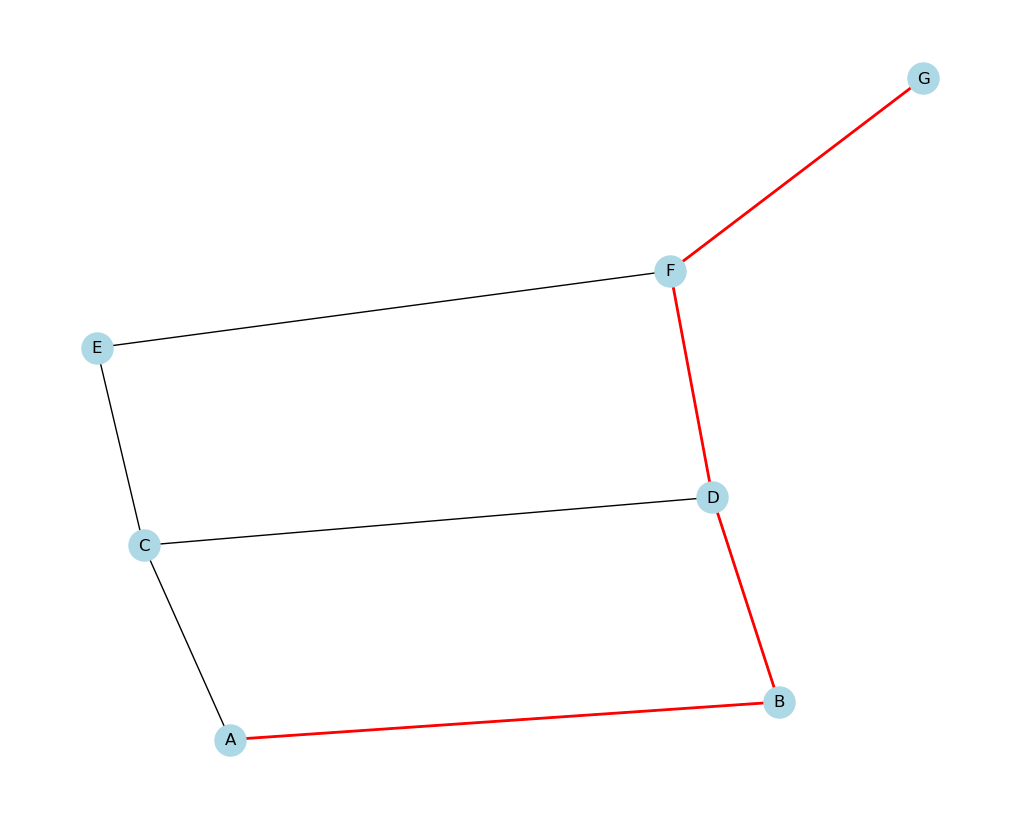

BFS Path: ['A', 'B', 'D', 'F', 'G']


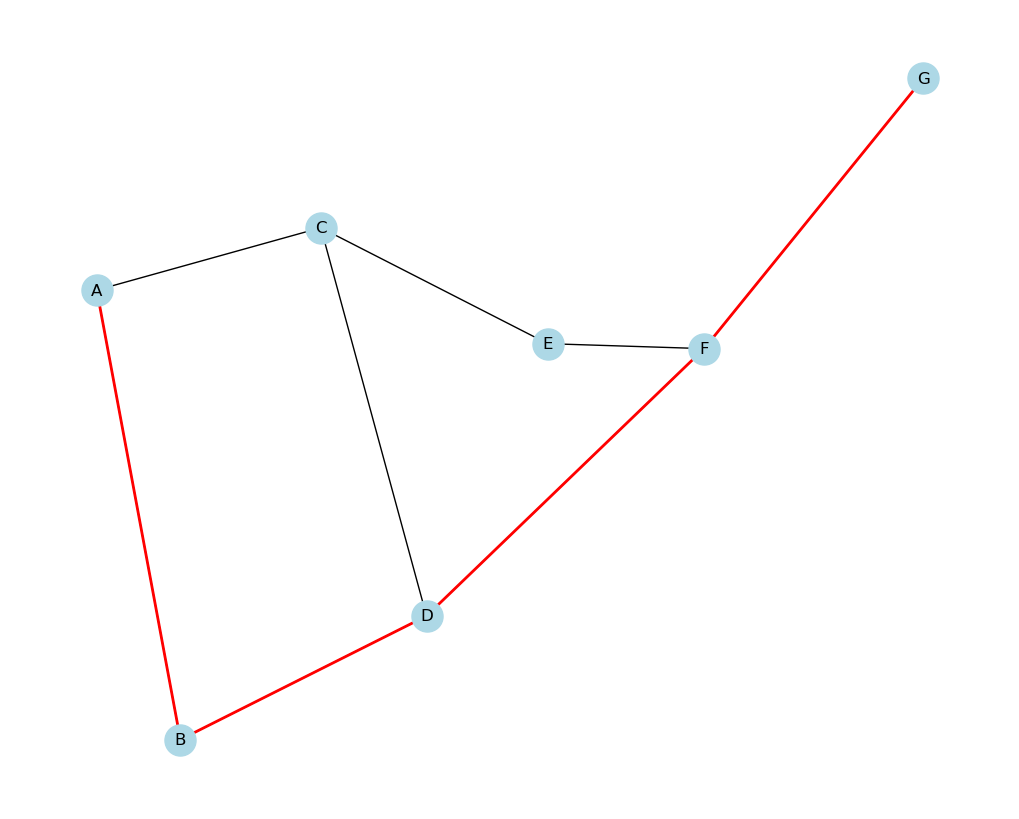

DFS Path: ['A', 'C', 'E', 'F', 'G']


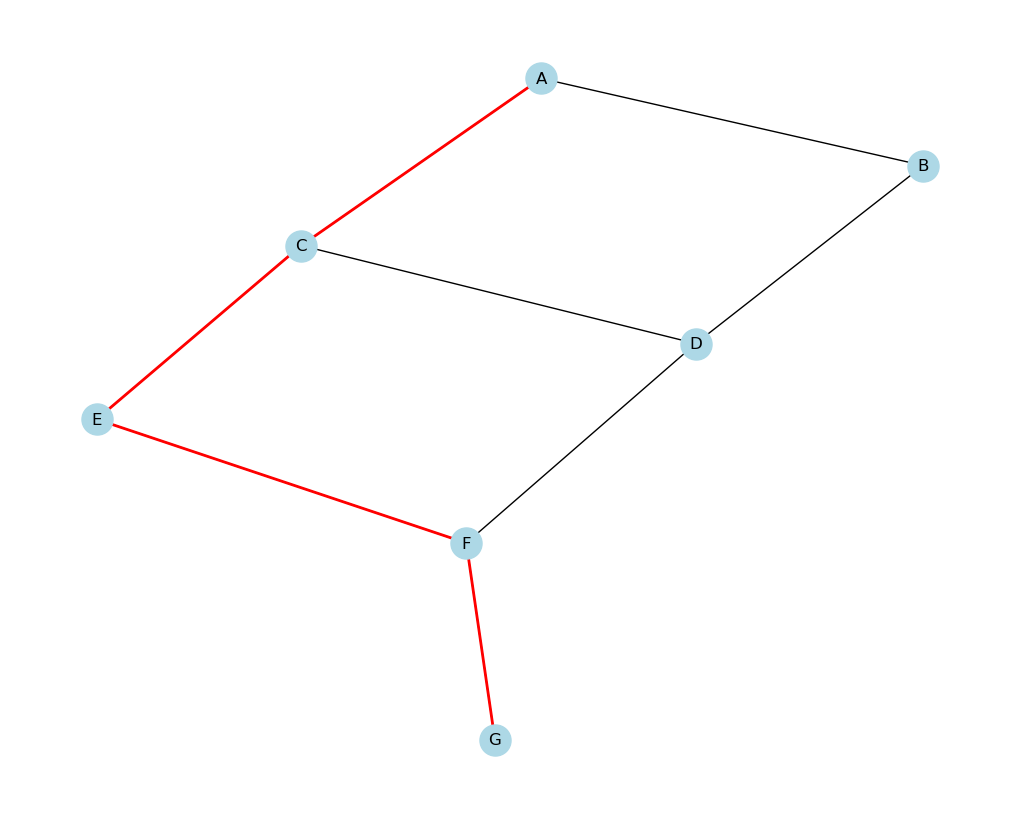

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

class RouteFinder:
    def __init__(self, graph):
        self.graph = graph

    def bidirectional_bfs(self, start, goal):
        if start == goal:
            return [start]


        forward_queue = deque([start])
        backward_queue = deque([goal])

        forward_visited = {start: None}
        backward_visited = {goal: None}

        while forward_queue and backward_queue:

            if forward_queue:
                current = forward_queue.popleft()
                for neighbor in self.graph.neighbors(current):
                    if neighbor not in forward_visited:
                        forward_visited[neighbor] = current
                        forward_queue.append(neighbor)


                        if neighbor in backward_visited:
                            return self._reconstruct_path(neighbor, forward_visited, backward_visited)


            if backward_queue:
                current = backward_queue.popleft()
                for neighbor in self.graph.neighbors(current):
                    if neighbor not in backward_visited:
                        backward_visited[neighbor] = current
                        backward_queue.append(neighbor)

                        if neighbor in forward_visited:
                            return self._reconstruct_path(neighbor, forward_visited, backward_visited)

        return None
    def bfs(self, start, goal):
        queue = deque([start])
        visited = {start: None}

        while queue:
            current = queue.popleft()
            if current == goal:
                return self._reconstruct_path(goal, visited, None)

            for neighbor in self.graph.neighbors(current):
                if neighbor not in visited:
                    visited[neighbor] = current
                    queue.append(neighbor)

        return None

    def dfs(self, start, goal):
        stack = [start]
        visited = {start: None}

        while stack:
            current = stack.pop()
            if current == goal:
                return self._reconstruct_path(goal, visited, None)

            for neighbor in self.graph.neighbors(current):
                if neighbor not in visited:
                    visited[neighbor] = current
                    stack.append(neighbor)

        return None
    def _reconstruct_path(self, meeting_point, forward_visited, backward_visited):

        path = []
        current = meeting_point
        while current is not None:
            path.append(current)
            current = forward_visited[current]

        path.reverse()


        if backward_visited:
            current = backward_visited[meeting_point]
            while current is not None:
                path.append(current)
                current = backward_visited[current]

        return path

    def visualize(self, path):
        pos = nx.spring_layout(self.graph)
        plt.figure(figsize=(10, 8))

        nx.draw(self.graph, pos, with_labels=True, node_color='lightblue', node_size=500)

        if path:
            edge_list = list(zip(path, path[1:]))
            nx.draw_networkx_edges(self.graph, pos, edgelist=edge_list, edge_color='red', width=2)

        plt.show()


g = nx.Graph()

g.add_edges_from([
    ("A", "B"), ("A", "C"), ("B", "D"), ("C", "D"),
    ("C", "E"), ("D", "F"), ("E", "F"), ("F", "G"),
])

route_finder = RouteFinder(g)
start, goal = "A", "G"


path_bidirectional = route_finder.bidirectional_bfs(start, goal)
print("Bi-directional BFS Path:", path_bidirectional)
route_finder.visualize(path_bidirectional)


path_bfs = route_finder.bfs(start, goal)
print("BFS Path:", path_bfs)
route_finder.visualize(path_bfs)


path_dfs = route_finder.dfs(start, goal)
print("DFS Path:", path_dfs)
route_finder.visualize(path_dfs)
